# Time Series DIY: Seasonal Decomposition

## Setup

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

# settings
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
%config InlineBackend.figure_format = "retina"

## Data

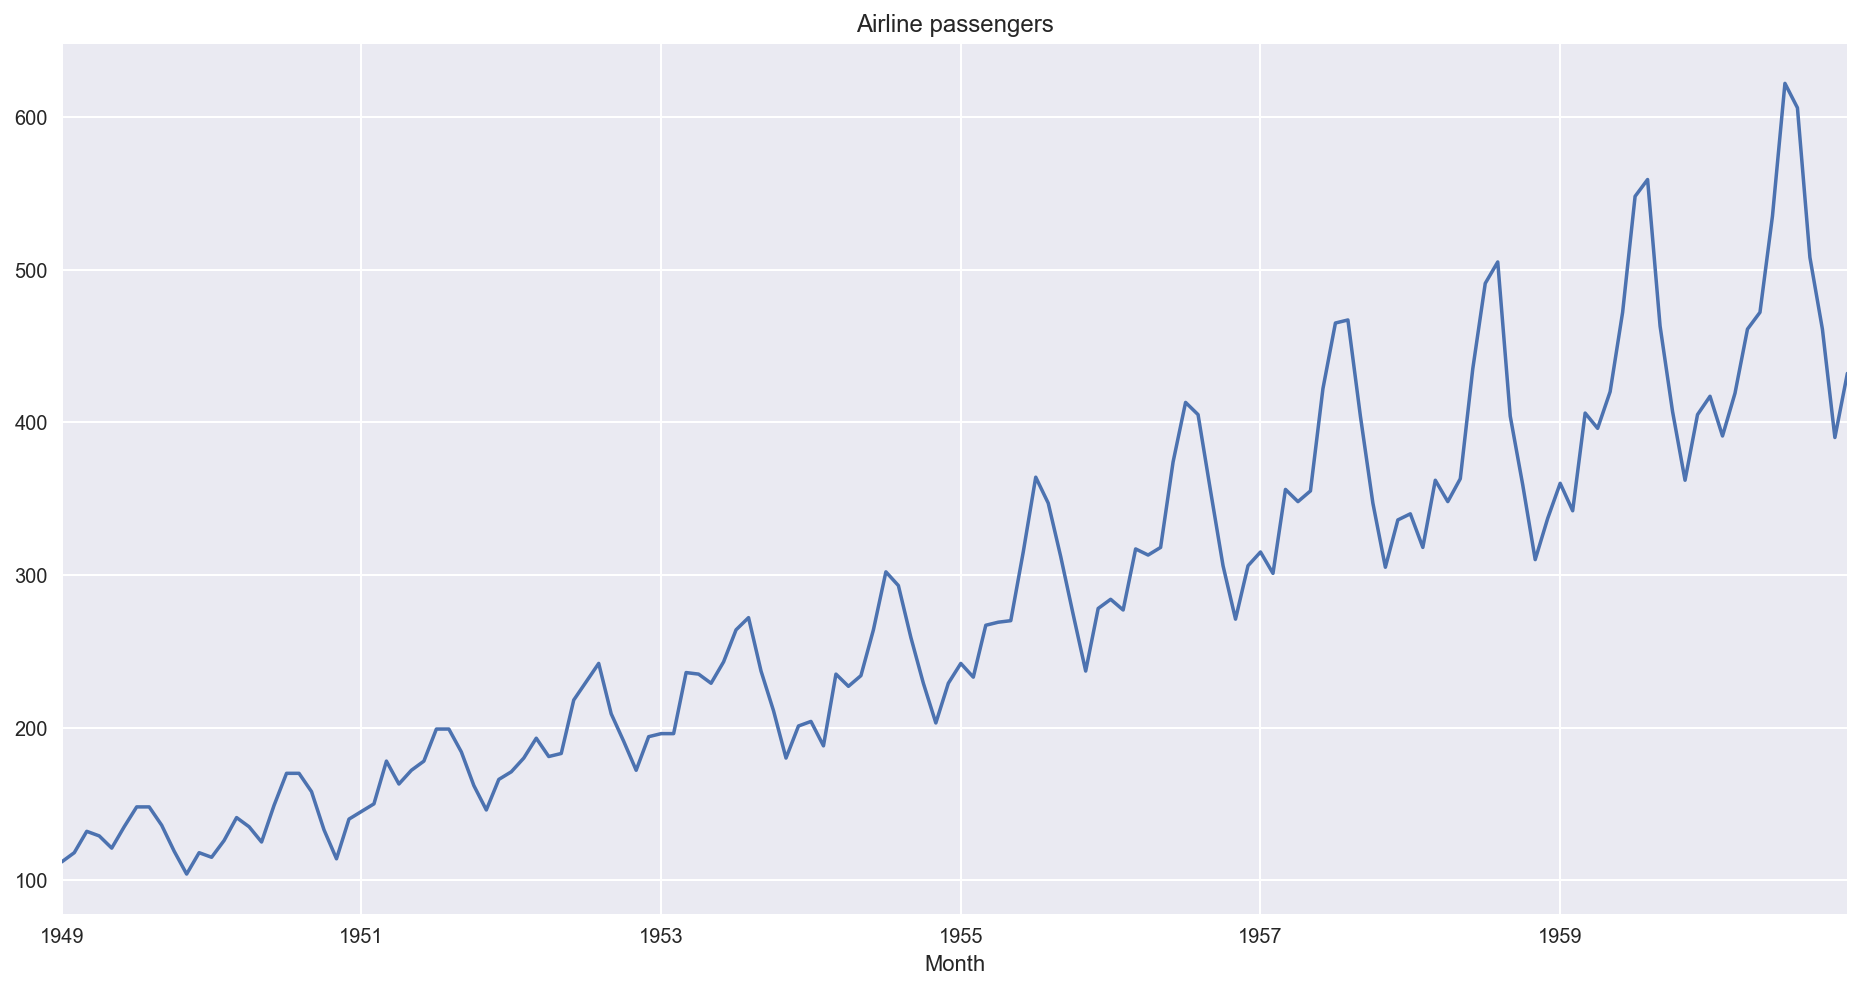

In [3]:
df = pd.read_csv("../data/air_passengers.csv", index_col=0)
df.index = pd.to_datetime(df.index)
y = df["Passengers"]
y.name = "n_passengers"

y.plot(title="Airline passengers");

## Benchmark from `statsmodels`

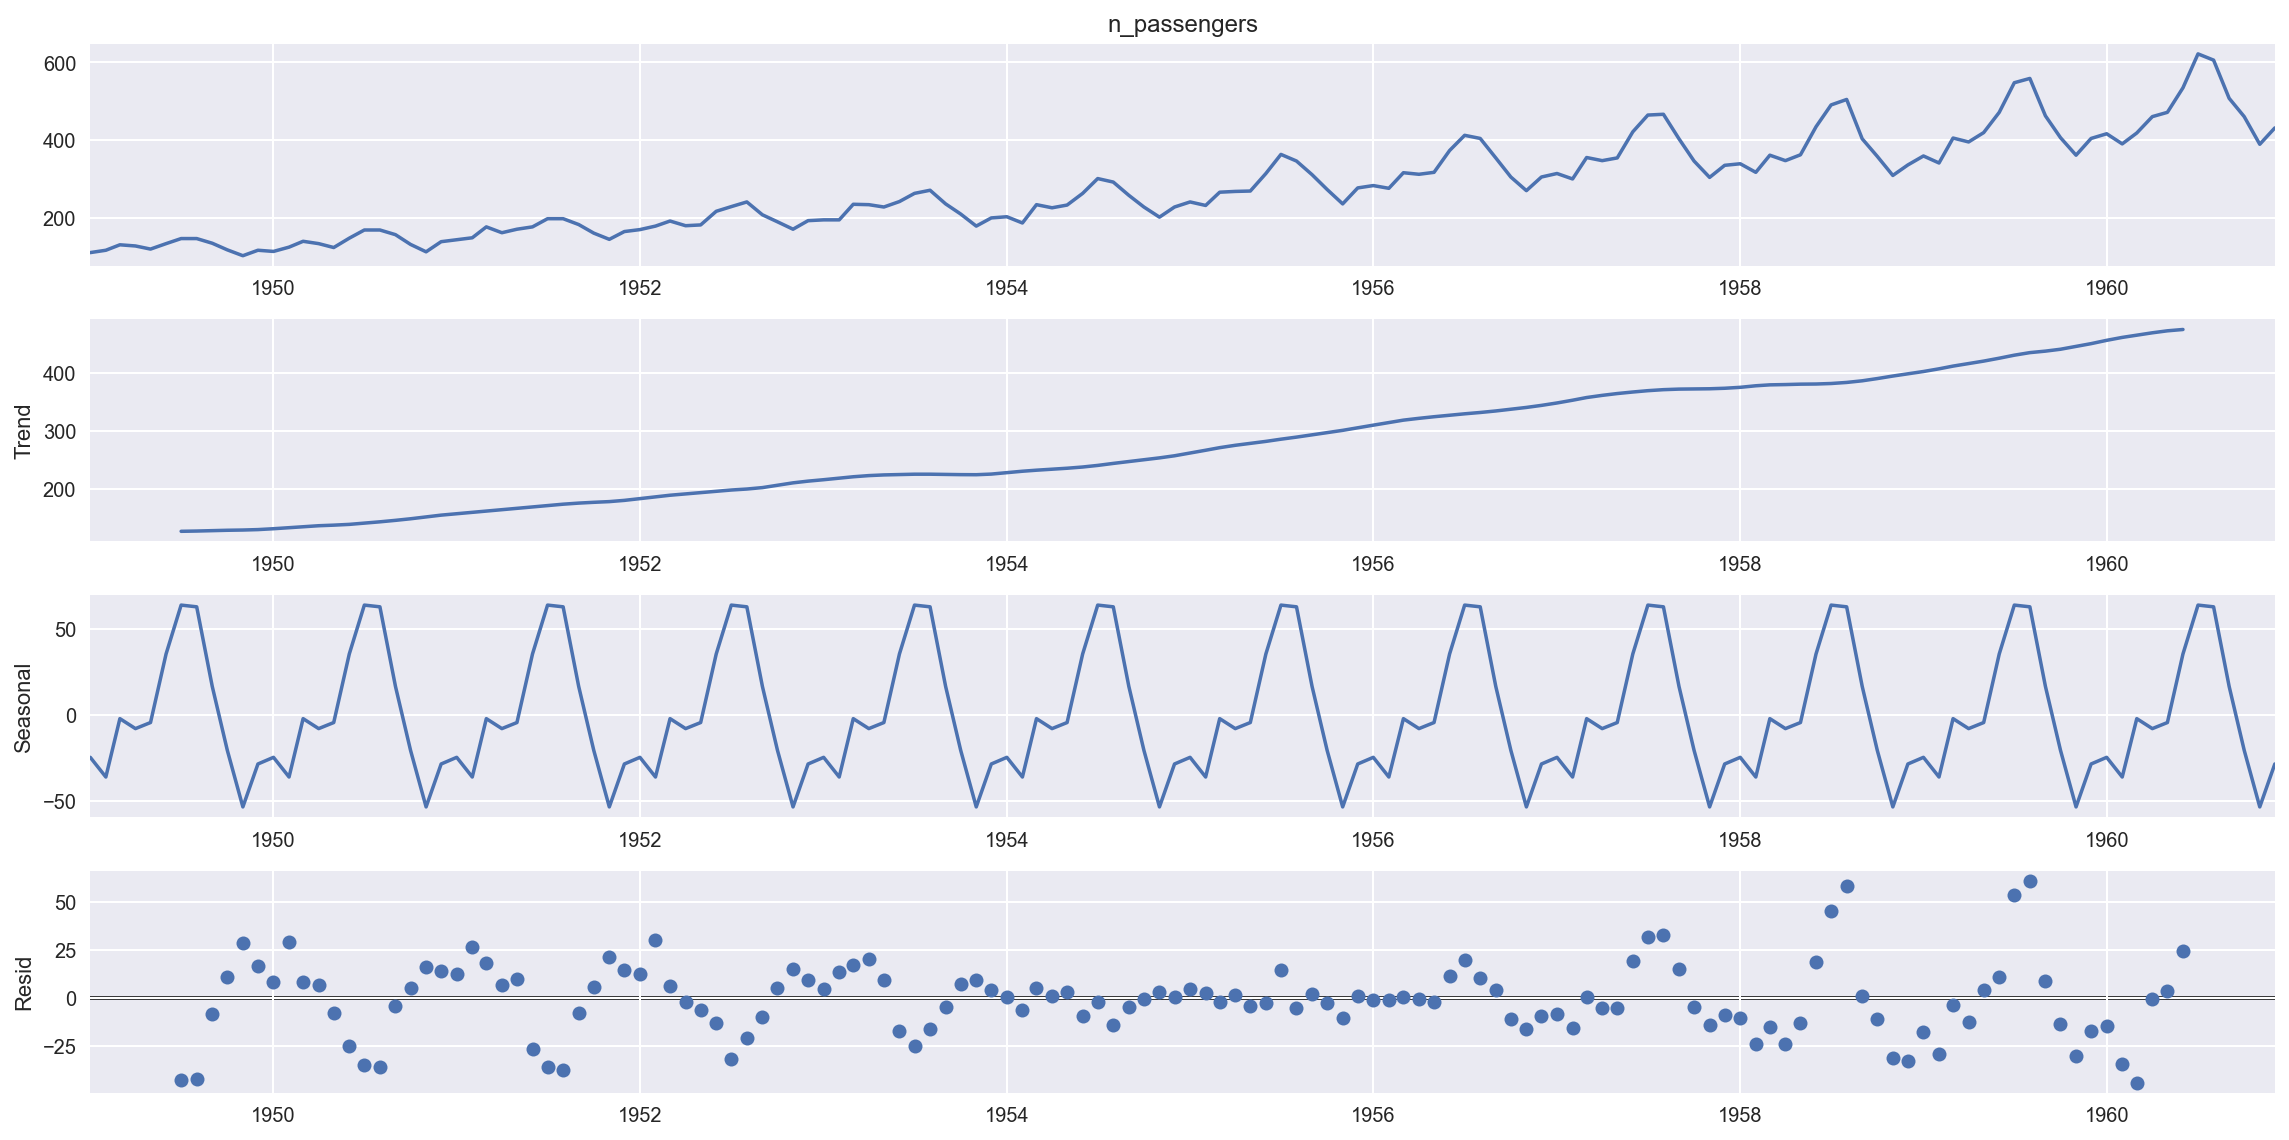

In [4]:
seasonal_decomp = seasonal_decompose(y, model="additive")
seasonal_decomp.plot();

## Manual decomposition

In [5]:
seasonal_df = y.to_frame()
seasonal_df

,n_passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
seasonal_df["trend"] = seasonal_df["n_passengers"].rolling(window=13, center=True).mean()
seasonal_df.head(10)

,n_passengers,trend
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,125.769231
1949-08-01,148,126.846154
1949-09-01,136,128.615385


In [7]:
seasonal_df.tail(10)

,n_passengers,trend
Month,,
1960-03-01,419,466.769231
1960-04-01,461,466.615385
1960-05-01,472,465.307692
1960-06-01,535,470.692308
1960-07-01,622,NaN
1960-08-01,606,NaN
1960-09-01,508,NaN
1960-10-01,461,NaN
1960-11-01,390,NaN


In [8]:
seasonal_df["detrended"] = seasonal_df["n_passengers"] - seasonal_df["trend"]
seasonal_df.head(10)

,n_passengers,trend,detrended
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,125.769231,22.230769
1949-08-01,148,126.846154,21.153846
1949-09-01,136,128.615385,7.384615


In [9]:
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")
seasonal_df.head(15)

,n_passengers,trend,detrended,month,seasonality
Month,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175
1949-02-01,118,NaN,NaN,2,-42.027972
1949-03-01,132,NaN,NaN,3,-4.139860
1949-04-01,129,NaN,NaN,4,-6.944056
1949-05-01,121,NaN,NaN,5,-0.699301
1949-06-01,135,NaN,NaN,6,37.146853
1949-07-01,148,125.769231,22.230769,7,64.923077
1949-08-01,148,126.846154,21.153846,8,64.580420
1949-09-01,136,128.615385,7.384615,9,15.636364


In [10]:
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]
seasonal_df.head(15)

,n_passengers,trend,detrended,month,seasonality,resid
Month,,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175,NaN
1949-02-01,118,NaN,NaN,2,-42.027972,NaN
1949-03-01,132,NaN,NaN,3,-4.139860,NaN
1949-04-01,129,NaN,NaN,4,-6.944056,NaN
1949-05-01,121,NaN,NaN,5,-0.699301,NaN
1949-06-01,135,NaN,NaN,6,37.146853,NaN
1949-07-01,148,125.769231,22.230769,7,64.923077,-42.692308
1949-08-01,148,126.846154,21.153846,8,64.580420,-43.426573
1949-09-01,136,128.615385,7.384615,9,15.636364,-8.251748


And all the steps above, combined into a single cell:

In [11]:
# create the DF
seasonal_df = y.to_frame()

# calculate the trend component
seasonal_df["trend"] = seasonal_df["n_passengers"].rolling(window=13, center=True).mean()

# detrend the series
seasonal_df["detrended"] = seasonal_df["n_passengers"] - seasonal_df["trend"]

# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

# display the DF
seasonal_df.head(15)

,n_passengers,trend,detrended,month,seasonality,resid
Month,,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175,NaN
1949-02-01,118,NaN,NaN,2,-42.027972,NaN
1949-03-01,132,NaN,NaN,3,-4.139860,NaN
1949-04-01,129,NaN,NaN,4,-6.944056,NaN
1949-05-01,121,NaN,NaN,5,-0.699301,NaN
1949-06-01,135,NaN,NaN,6,37.146853,NaN
1949-07-01,148,125.769231,22.230769,7,64.923077,-42.692308
1949-08-01,148,126.846154,21.153846,8,64.580420,-43.426573
1949-09-01,136,128.615385,7.384615,9,15.636364,-8.251748


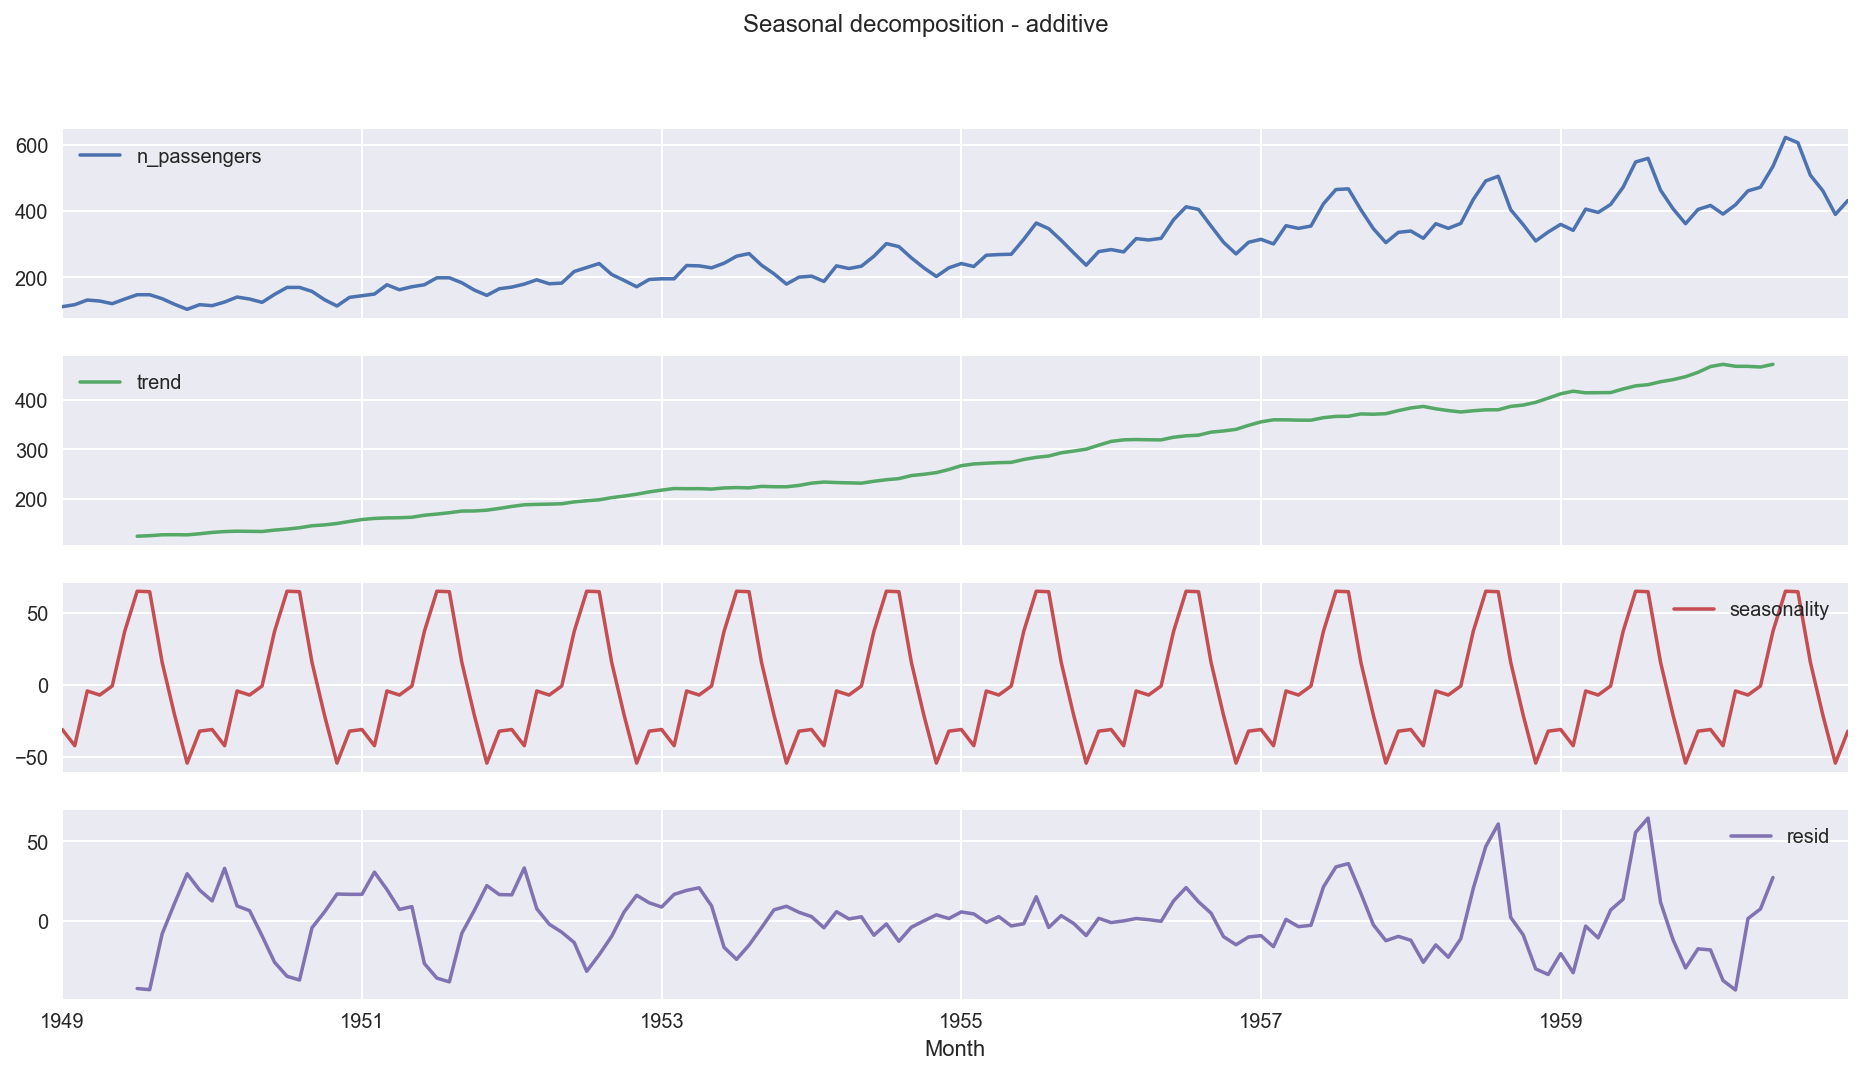

In [12]:
(
    seasonal_df
    .loc[:, ["n_passengers", "trend", "seasonality", "resid"]]
    .plot(subplots=True, title="Seasonal decomposition - additive")
);

## Results comparison

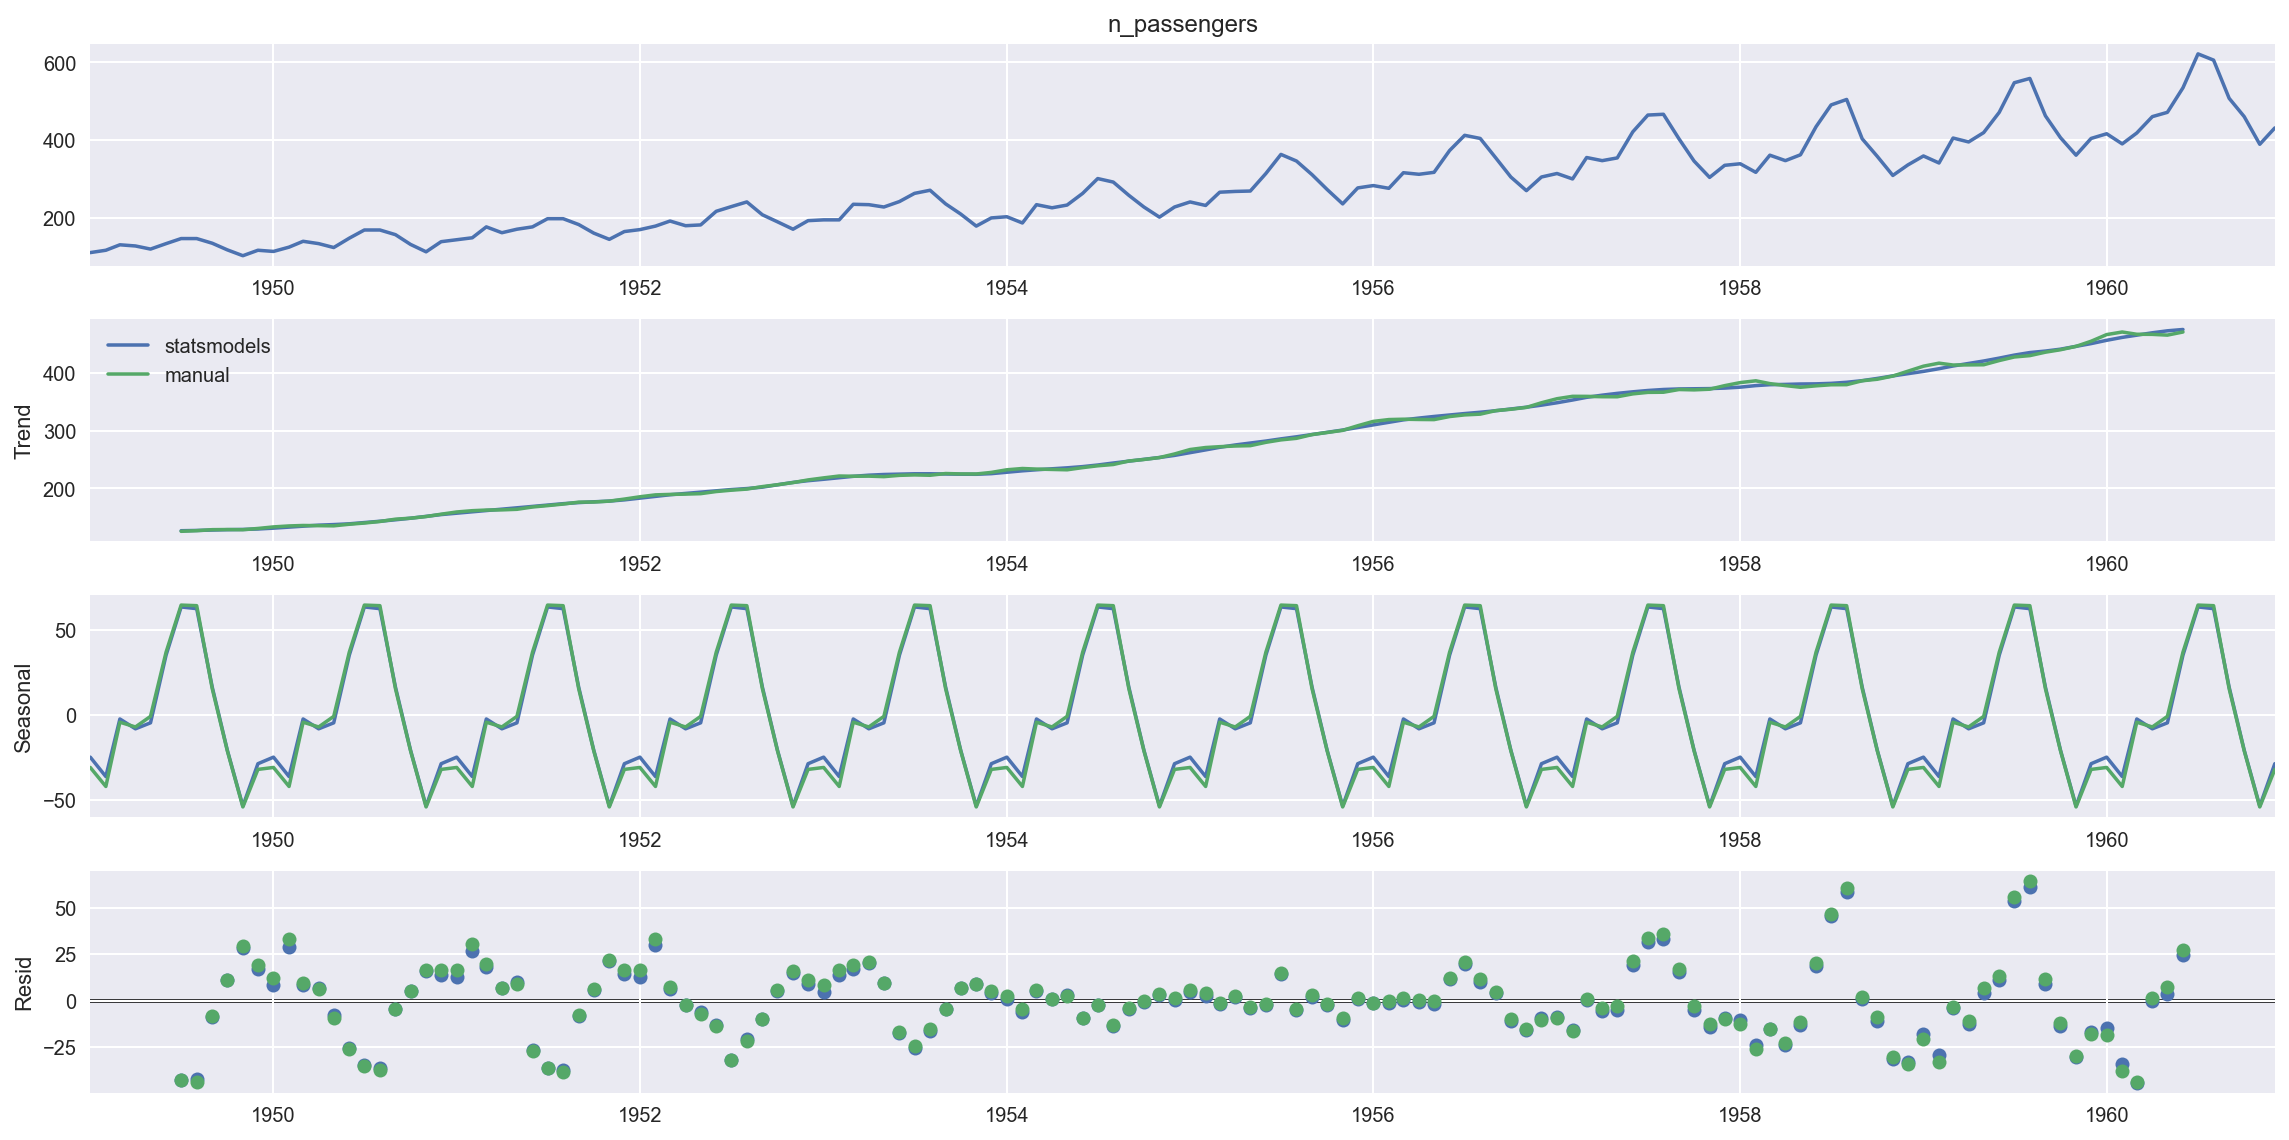

In [13]:
from statsmodels.tsa.seasonal import DecomposeResult 

manual_decomposition = DecomposeResult(
    seasonal=seasonal_df["seasonality"],
    trend=seasonal_df["trend"],
    resid=seasonal_df["resid"],
    observed=seasonal_df["n_passengers"],
)

def add_second_decomp_plot(fig, res, legend):
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

fig = seasonal_decomp.plot()
add_second_decomp_plot(fig, manual_decomposition, ["statsmodels", "manual"]);